<a href="https://colab.research.google.com/github/BranislavMajernik/zerocode/blob/master/Anomaly2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas as pd
import os
import numpy as np
import pandas as pd
import datetime
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import glob


In [16]:
from google.colab import files
uploaded = files.upload()

Saving demo-testing-data.json to demo-testing-data.json


In [21]:
df = pd.read_csv('demo-training-data.csv')
df.head()
dfj = pd.read_json('demo-testing-data.json', orient='index')
dfj.to_csv('streaming.csv', index=False)
dfjc = pd.read_csv('streaming.csv')
dfjc.head()

,0
0,INLINE
1,"['temperature_1', 'temperature_2', 'temperatur..."
2,"[{'timestamp': '2019-01-07T21:00:08Z', 'values..."


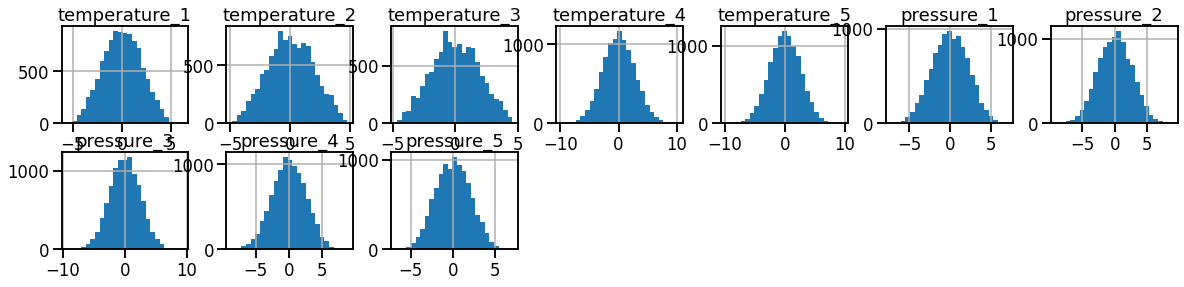

In [23]:
df.hist(df.columns, bins=25, layout=(8,7), figsize=(20, 18))
plt.show()


In [13]:
df_tidy = df.dropna()
import warnings
warnings.filterwarnings("ignore")
df_tidy['date'] = pd.to_datetime(df_tidy['timestamp'])
del df_tidy['timestamp']
df_tidy = df_tidy.set_index('date')
df_tidy.head()
df_tidy.to_csv('IOToutput.csv')

In [6]:
df=pd.read_csv('IOToutput.csv')

In [7]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_1,10000.0,0.036904,1.935097,-5.5563,-1.347525,0.02395,1.428525,6.1903
temperature_2,10000.0,0.031107,1.885642,-4.8166,-1.313425,0.00485,1.404400,4.7556
temperature_3,10000.0,0.032081,1.881413,-4.6571,-1.300275,0.01275,1.410325,4.5794
temperature_4,10000.0,0.024357,2.744656,-9.7281,-1.848275,0.01520,1.906875,10.0628
temperature_5,10000.0,0.045238,2.534600,-9.6833,-1.693275,0.04440,1.821200,9.5810
pressure_1,10000.0,0.020063,2.187237,-7.1471,-1.524400,0.01365,1.581675,6.9222
pressure_2,10000.0,0.039876,2.573272,-8.9330,-1.750875,0.07115,1.824550,8.7331
pressure_3,10000.0,0.023737,2.448053,-9.2730,-1.644100,0.02790,1.708725,9.3420
pressure_4,10000.0,0.043421,2.528871,-8.5572,-1.688100,0.01210,1.817675,8.8644
pressure_5,10000.0,0.025466,2.047034,-6.6104,-1.418475,0.04440,1.488550,7.0459


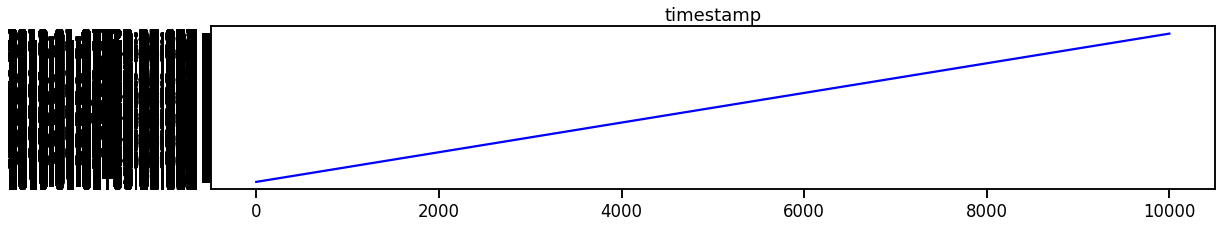

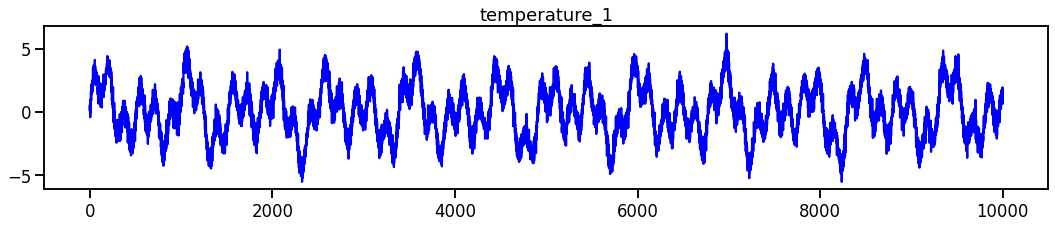

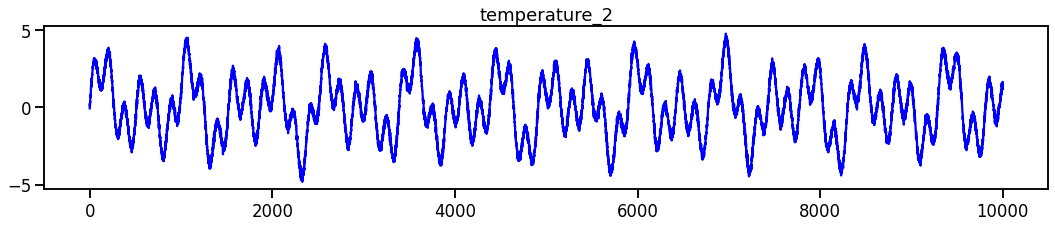

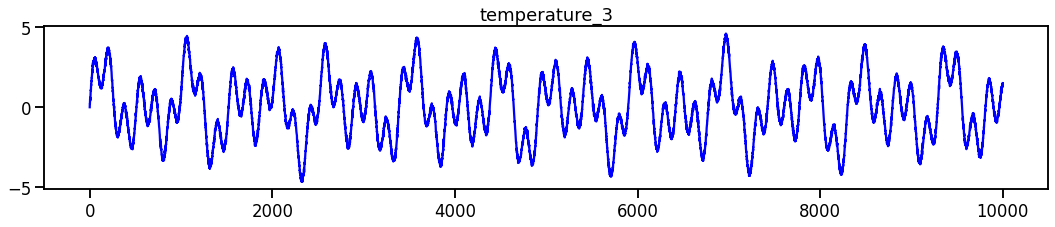

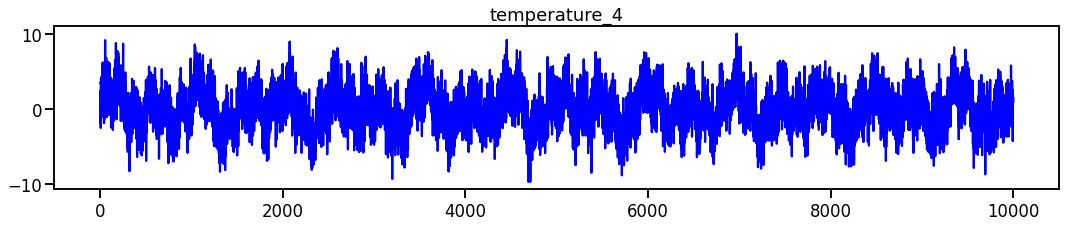

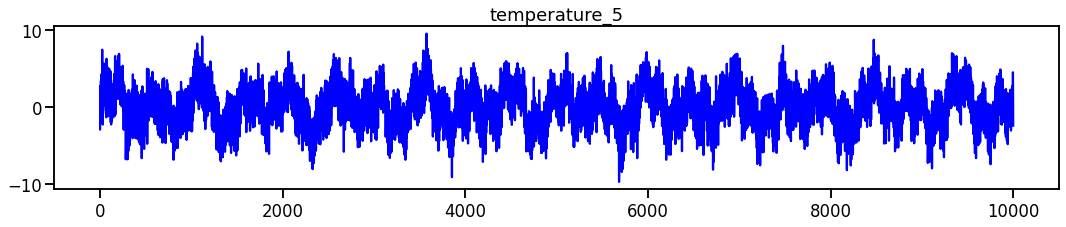

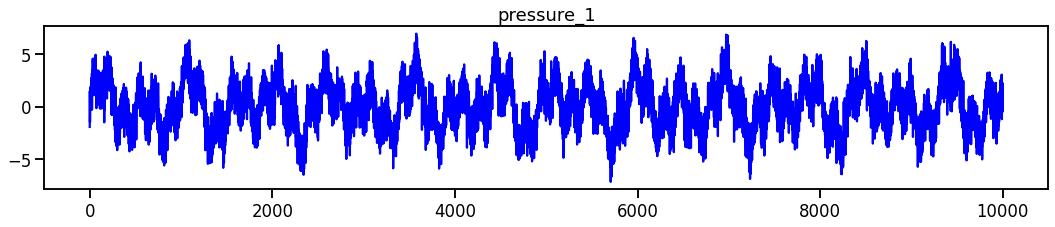

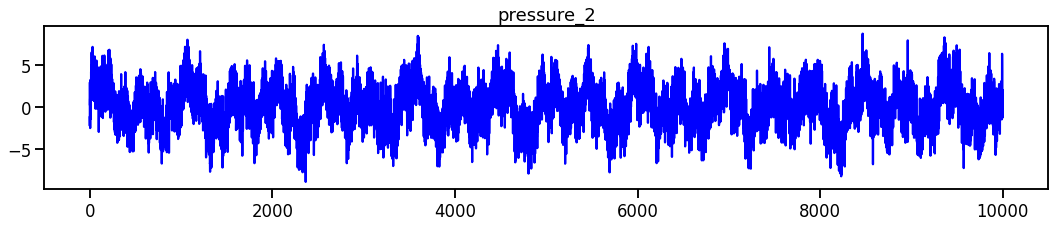

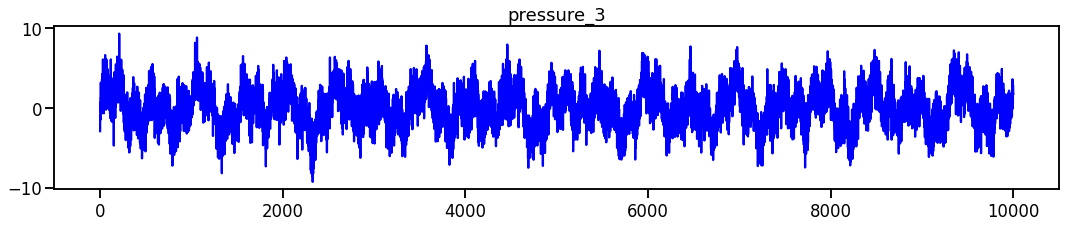

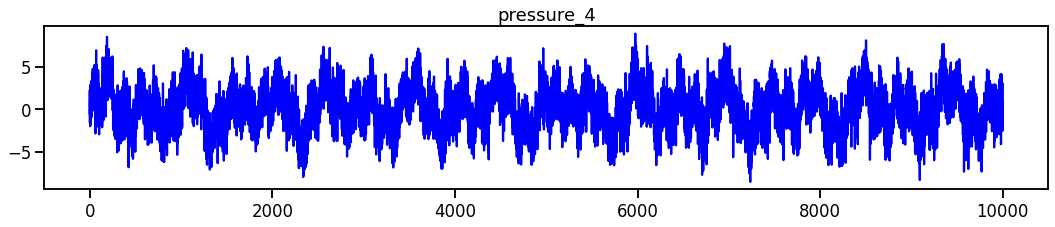

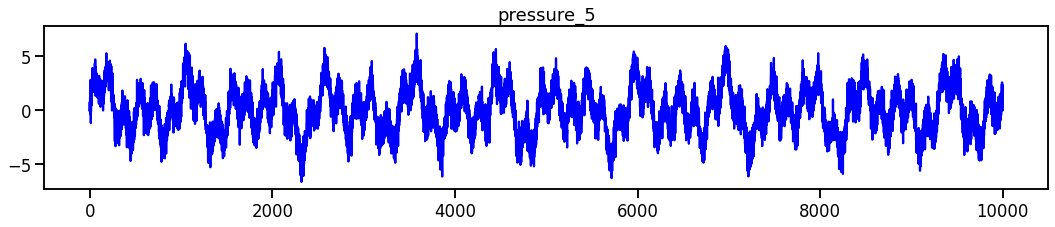

In [25]:
# Vizualize time series in the same graph for each sensor
import warnings
import seaborn as sns
names=df.columns
for name in names:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df[name], color='blue')
    _ = plt.title(name)
    plt.show()